# Summary

Today, we will learn: 

* `df.loc[]`
* `df.set_index()` and `df.reset_index()`
* `df.copy()`
* `df.rename(columns=DICT)`
* `del df['var']`
* `df.head()`
* `pd.wide_to_long()`
* `df.var.isnull()`
* `df.var.sum()`
* `pd.read_excel()`
* `df.to_excel()`

# Pandas data frames 

In [3]:
import pandas as pd

In Pandas, the fundamental object of interest is a pandas dataframe. For example, 

In [4]:
X = pd.DataFrame(data = [[1,11.7,'Vitus'],[2,13.9,'Maximilian'],[3,14.6,'Bo-Bob']], columns=['id','inc','name'])
X

id   inc        name
0   1  11.7       Vitus
1   2  13.9  Maximilian
2   3  14.6      Bo-Bob

A dataframe is essentially a matrix. 
* Rows = observations 
* Columns = variables 

## Indexing ("subsetting") 

Choosing a subset of the rows and/or columns of a dataframe is known as "indexing". All pandas dataframes are born with the method `loc[]`. 
* `df.loc[df['year'] == 2002, :]` selects the rows where the variable `year` is equal to 2002 and all columns (indicated by `:`)
    * *Alternatively*,  `df[df['year'] == 2002]`
* `df.loc[:, ['year']]` selects all rows (indicated by `:`) but only the column (variable) `year`. 
    * *Alternatively*,  `df['year']`
* `df.loc[df['year'] == 2002, ['name']]` selects the variable `name` and shows the rows where `year` is equal to 2002. 
    * *Alternatively*, `df[df['year']==2002]['name']`
    
In general, the syntax is `df.loc[CONDITION, [VARLIST]]`, where `CONDITION` is a vector of logical statements with the same length as the number of rows in the dataframe. 

**General rule:** Always use `df.loc` for assignments; you can use the alternatives if you are merely looking/plotting/etc.

In [5]:
X.loc[X.id > 1, ['name']]

name
1  Maximilian
2      Bo-Bob

## Adding a variable

Variables are added with `df['newvar'] = SOMETHING`. **Note:** You cannot write `df.newvar = SOMETHING`. Some of you will forget. I promise. 

In [6]:
X['year'] = [2003, 2005, 2010]
X

id   inc        name  year
0   1  11.7       Vitus  2003
1   2  13.9  Maximilian  2005
2   3  14.6      Bo-Bob  2010

In [7]:
X['inc_trending'] = X['inc'] + X['year']/2000
X

id   inc        name  year  inc_trending
0   1  11.7       Vitus  2003       12.7015
1   2  13.9  Maximilian  2005       14.9025
2   3  14.6      Bo-Bob  2010       15.6050

## The index

The first column in the dataset is referred to as the `index` of the dataframe. If you haven't done anything, it is just `[0, 1, 2, ....]`. If you specify integers instead of a vector of logicals into `df.loc[]` (or directly into `df[]`), then pandas will find the rows where the index is equal to the values that you specify

In [6]:
X

id   inc        name  year
0   1  11.7       Vitus  2003
1   2  13.9  Maximilian  2005
2   3  14.6      Bo-Bob  2010

In [7]:
X.loc[1, :]

id               2
inc           13.9
name    Maximilian
year          2005
Name: 1, dtype: object

In general, we do not want to look up using the index. If you want to see the top, use `df.head()`. 

In [15]:
X.head(2)

id   inc        name  year  inc_trending
0   1  11.7       Vitus  2003       12.7015
1   2  13.9  Maximilian  2005       14.9025

### Assigning a different index

You can use many other things as indexes. This can sometimes be useful, but it is not necessary. 

For example the name: 

In [16]:
X2 = X.set_index('name') 
X2

id   inc  year  inc_trending
name                                    
Vitus        1  11.7  2003       12.7015
Maximilian   2  13.9  2005       14.9025
Bo-Bob       3  14.6  2010       15.6050

In [9]:
X2.loc['Vitus']

id         1.0
inc       11.7
year    2003.0
Name: Vitus, dtype: float64

**XXX Series vs. frame XXX**

## Assignments to a subset of rows

Use a logical statement to select a subset of rows. Your RHS must then either be 
* A single value (all rows are set to this) 
* A list of values with same length as the number of selected rows.  

In [40]:
X

id   inc        name  year  inc_trending
0   1  11.7       Vitus  2003       12.7015
1   2  13.9  Maximilian  2005       14.9025
2   3  14.6      Bo-Bob  2010       15.6050

In [41]:
X2 = X.copy()

X2.loc[X2['id'] <= 2, ['name']] = 'hej'
X2

id   inc    name  year  inc_trending
0   1  11.7     hej  2003       12.7015
1   2  13.9     hej  2005       14.9025
2   3  14.6  Bo-Bob  2010       15.6050

In [50]:
X3 = X.copy()

X3.loc[(X3['name'] == 'Vitus') | (X3['year'] == 2005), ['name']] = ['Bib', 'Peter']
X3

id   inc    name  year  inc_trending
0   1  11.7     Bib  2003       12.7015
1   2  13.9   Peter  2005       14.9025
2   3  14.6  Bo-Bob  2010       15.6050

## Data types

When you select an individual variable, it has the data type `series`. Some functions work on a pandas series (e.g. most numpy functions), but some only work on numpy arrays (e.g. scipy.stats.kurtosis). Therefore, it is nice to extract the underlying numpy objects: 
* `df`: pandas dataframe 
* `df['variable']`: pandas series 
* `df['variabe'].values`: Numpy array

In [101]:
type(X) 

pandas.core.frame.DataFrame

In [102]:
type(X['year'])

pandas.core.series.Series

In [103]:
type(X['year'].values)

numpy.ndarray

# Reading and writing data

In [99]:
# next, we need to make sure that we have the "data" subfolder and that it has the datasets we need 
# print contents of the "data" subfolder. 
import os 
os.listdir('./data')

['medstat',
 'areal.xlsx',
 'INDKP107.xlsx',
 'INDKP107_tall.csv',
 '.DS_Store',
 'house_prices',
 'RAS200.xlsx',
 'area.csv',
 'RAS200_tall.csv']

## Reading in data

Pandas offers a lot of facilities for reading and writing to different formats. The functions have logical names: 
* CSV: `pd.read_csv()`
* SAS: `pd.read_sas()`
* Excel: `pd.read_excel()`
* Stata: `pd.read_stata()`

Whenever we look at larger dataframes, we will be using `df.head(10)` to inspect the first 10 rows, or `df.sample(10)` to look at 10 random rows (when the first 10 are special, for example). 

In [104]:
# Example: raw download from DST
# NOTE: the file must be in a sub folder "data" to the folder where jupyter was launched
fname = './data/RAS200.xlsx'

In [141]:
# First attempt
pd.read_excel(fname).head(10)

Erhvervs- og beskæftigelsesfrekvenser (ultimo november) efter frekvens, køn, alder, herkomst, område og tid  \
0                                        Enhed: pct.                                                            
1                                                NaN                                                            
2                             Beskæftigelsesfrekvens                                                            
3                                                NaN                                                            
4                                                NaN                                                            
5                                                NaN                                                            
6                                                NaN                                                            
7                                                NaN                                                            
8                                                NaN                                                            
9                                                NaN                                                            

  Unnamed: 1   Unnamed: 2 Unnamed: 3                 Unnamed: 4  Unnamed: 5  \
0        NaN          NaN        NaN                        NaN         NaN   
1        NaN          NaN        NaN                        NaN      2008.0   
2      I alt  Alder i alt      I alt                Hele landet        76.0   
3        NaN          NaN        NaN         Region Hovedstaden        75.8   
4        NaN          NaN        NaN    Landsdel Byen København        73.4   
5        NaN          NaN        NaN                  København        72.5   
6        NaN          NaN        NaN              Frederiksberg        75.6   
7        NaN          NaN        NaN                     Dragør        80.5   
8        NaN          NaN        NaN                     Tårnby        79.0   
9        NaN          NaN        NaN  Landsdel Københavns omegn        77.1   

   Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  Unnamed: 10  Unnamed: 11  \
0         NaN         NaN         NaN         NaN          NaN          NaN   
1      2009.0      2010.0      2011.0      2012.0       2013.0       2014.0   
2        72.8        72.1        71.8        71.3         71.3         71.6   
3        73.3        72.6        72.5        72.2         72.3         72.5   
4        71.0        70.5        70.5        70.4         70.6         70.9   
5        70.0        69.7        69.6        69.4         69.7         70.0   
6        73.7        72.7        72.8        73.0         73.3         73.5   
7        78.8        78.5        78.5        78.7         78.7         78.9   
8        76.3        75.4        75.8        75.4         75.8         75.7   
9        74.2        73.2        73.0        72.4         72.4         72.6   

   Unnamed: 12  Unnamed: 13  
0          NaN          NaN  
1       2015.0       2016.0  
2         72.1         72.8  
3         73.2         73.8  
4         71.6         72.3  
5         70.8         71.5  
6         74.0         74.7  
7         78.6         79.2  
8         76.5         77.4  
9         73.3         73.8

### Getting the right columns and rows

Clearly, we should skip some of the first three rows and some of the first four columns

In [142]:
empl = pd.read_excel(fname, skiprows=2)
empl.head(10)

Unnamed: 0 Unnamed: 1   Unnamed: 2 Unnamed: 3  \
0  Beskæftigelsesfrekvens      I alt  Alder i alt      I alt   
1                     NaN        NaN          NaN        NaN   
2                     NaN        NaN          NaN        NaN   
3                     NaN        NaN          NaN        NaN   
4                     NaN        NaN          NaN        NaN   
5                     NaN        NaN          NaN        NaN   
6                     NaN        NaN          NaN        NaN   
7                     NaN        NaN          NaN        NaN   
8                     NaN        NaN          NaN        NaN   
9                     NaN        NaN          NaN        NaN   

                  Unnamed: 4  2008  2009  2010  2011  2012  2013  2014  2015  \
0                Hele landet  76.0  72.8  72.1  71.8  71.3  71.3  71.6  72.1   
1         Region Hovedstaden  75.8  73.3  72.6  72.5  72.2  72.3  72.5  73.2   
2    Landsdel Byen København  73.4  71.0  70.5  70.5  70.4  70.6  70.9  71.6   
3                  København  72.5  70.0  69.7  69.6  69.4  69.7  70.0  70.8   
4              Frederiksberg  75.6  73.7  72.7  72.8  73.0  73.3  73.5  74.0   
5                     Dragør  80.5  78.8  78.5  78.5  78.7  78.7  78.9  78.6   
6                     Tårnby  79.0  76.3  75.4  75.8  75.4  75.8  75.7  76.5   
7  Landsdel Københavns omegn  77.1  74.2  73.2  73.0  72.4  72.4  72.6  73.3   
8                Albertslund  73.1  69.2  67.5  67.4  66.5  67.0  67.4  68.7   
9                   Ballerup  75.9  72.9  71.9  72.0  71.4  71.0  71.8  72.8   

   2016  
0  72.8  
1  73.8  
2  72.3  
3  71.5  
4  74.7  
5  79.2  
6  77.4  
7  73.8  
8  68.8  
9  73.6

The first couple of columns are not needed and contain only missing values (denoted by `NaN` (Not a Number)), so we will drop those. 

In [143]:
drop_these = ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3']

In [144]:
empl.drop(drop_these, axis=1, inplace=True)

In [145]:
empl.head(5)

Unnamed: 4  2008  2009  2010  2011  2012  2013  2014  2015  \
0              Hele landet  76.0  72.8  72.1  71.8  71.3  71.3  71.6  72.1   
1       Region Hovedstaden  75.8  73.3  72.6  72.5  72.2  72.3  72.5  73.2   
2  Landsdel Byen København  73.4  71.0  70.5  70.5  70.4  70.6  70.9  71.6   
3                København  72.5  70.0  69.7  69.6  69.4  69.7  70.0  70.8   
4            Frederiksberg  75.6  73.7  72.7  72.8  73.0  73.3  73.5  74.0   

   2016  
0  72.8  
1  73.8  
2  72.3  
3  71.5  
4  74.7

> Alternatively, use `del empl['Unnamed: 0']`

### Renaming variables

Let's rename the first variable, which is now called `Unnamed: 4`. This is done using `df.rename(columns=dict)`, where dict must be a Python *dictionary*. A dictionary specifies a map between `key` and `value` like so: `dict = {key:value}`. In our case, both will be strings. 

In [146]:
empl.rename(columns = {'Unnamed: 4':'municipality'}, inplace=True)

We also see that the employment rate in 2008 has been named `2008`. Having a variable that is named a number can cause problems with some functions (and many other programming languages do not even allow it), so let us change their names. To do so, we need to create a dictionary that maps each of the years {2008, ..., 2016} to {e2008, ..., e2016}. 

In [147]:
myDict = {}
for i in range(2008, 2017): # range goes from 2008 to but not including 2017
    myDict[str(i)] = f'e{i}' 
myDict

{'2008': 'e2008',
 '2009': 'e2009',
 '2010': 'e2010',
 '2011': 'e2011',
 '2012': 'e2012',
 '2013': 'e2013',
 '2014': 'e2014',
 '2015': 'e2015',
 '2016': 'e2016'}

In [148]:
empl.rename(columns = myDict, inplace=True)

In [149]:
empl.head(10)

municipality  e2008  e2009  e2010  e2011  e2012  e2013  e2014  \
0                Hele landet   76.0   72.8   72.1   71.8   71.3   71.3   71.6   
1         Region Hovedstaden   75.8   73.3   72.6   72.5   72.2   72.3   72.5   
2    Landsdel Byen København   73.4   71.0   70.5   70.5   70.4   70.6   70.9   
3                  København   72.5   70.0   69.7   69.6   69.4   69.7   70.0   
4              Frederiksberg   75.6   73.7   72.7   72.8   73.0   73.3   73.5   
5                     Dragør   80.5   78.8   78.5   78.5   78.7   78.7   78.9   
6                     Tårnby   79.0   76.3   75.4   75.8   75.4   75.8   75.7   
7  Landsdel Københavns omegn   77.1   74.2   73.2   73.0   72.4   72.4   72.6   
8                Albertslund   73.1   69.2   67.5   67.4   66.5   67.0   67.4   
9                   Ballerup   75.9   72.9   71.9   72.0   71.4   71.0   71.8   

   e2015  e2016  
0   72.1   72.8  
1   73.2   73.8  
2   71.6   72.3  
3   70.8   71.5  
4   74.0   74.7  
5   78.6   79.2  
6   76.5   77.4  
7   73.3   73.8  
8   68.7   68.8  
9   72.8   73.6

Now we can find the employment rate in the municipality where Anders grew up: 

In [150]:
empl.loc[empl.municipality == 'Lejre']

municipality  e2008  e2009  e2010  e2011  e2012  e2013  e2014  e2015  e2016
40        Lejre   81.5   79.4   78.3   78.2   77.5   77.4   77.3   78.2   78.6

### Dropping observations that are not actually municipalities 

The dataset contains observations like "Region Hovedstaden", which is not a municipality so we want to drop such rows. To do this, we can use the `df['var'].str` functionalities, in particular `df['var'].str.contains('PATTERN')`. 

In [151]:
I  = empl.municipality.str.contains('Region')
empl.loc[I, :]

municipality  e2008  e2009  e2010  e2011  e2012  e2013  e2014  \
1    Region Hovedstaden   75.8   73.3   72.6   72.5   72.2   72.3   72.5   
36      Region Sjælland   75.7   72.7   71.9   71.6   70.9   71.0   71.3   
56    Region Syddanmark   75.7   72.0   71.2   70.7   70.0   70.1   70.5   
81   Region Midtjylland   77.0   73.4   72.8   72.4   71.8   71.7   72.2   
103  Region Nordjylland   75.2   71.5   71.2   71.0   70.6   70.2   70.3   

     e2015  e2016  
1     73.2   73.8  
36    71.9   72.6  
56    70.8   71.6  
81    72.5   73.3  
103   70.7   71.7

Delete these rows. 

In [152]:
empl = empl.loc[I == False, :]

In [153]:
for val in ['Landsdel', 'Hele landet']: 
    I = empl.municipality.str.contains(val)
    empl = empl.loc[I == False]

### Summary statistics 

To get an overview of employments across municipalities we can use the function `df.describe()`. Note that each observation (municipality) is weighted equally. 

In [154]:
empl.describe()

e2008      e2009      e2010      e2011      e2012      e2013  \
count  99.000000  99.000000  99.000000  99.000000  99.000000  99.000000   
mean   76.629293  73.419192  72.794949  72.591919  72.020202  72.091919   
std     3.727538   3.626537   3.617062   3.691211   3.804240   3.704484   
min    62.900000  63.400000  62.400000  61.500000  60.700000  61.200000   
25%    74.650000  71.350000  70.550000  70.000000  69.450000  69.700000   
50%    76.800000  73.300000  72.900000  72.600000  72.100000  72.200000   
75%    79.150000  75.900000  75.200000  75.050000  74.500000  74.500000   
max    84.000000  81.500000  81.400000  80.500000  80.700000  80.500000   

           e2014      e2015      e2016  
count  99.000000  99.000000  99.000000  
mean   72.431313  72.876768  73.669697  
std     3.660062   3.647275   3.549690  
min    61.600000  62.200000  62.600000  
25%    70.200000  70.750000  71.500000  
50%    72.600000  73.100000  74.000000  
75%    74.700000  75.200000  75.700000  
max    80.900000  81.200000  81.800000

## Long vs. wide datasets: `pd.wide_to_long()`

Often in economic applications, it can be useful to switch between *wide* vs. *long* formats (long is sometimes referred to as *tall*, e.g. in Stata). This is done by the commends `pd.wide_to_long()` (and `pd.long_to_wide()`). 

Many types of analyses are easier to do in one format than in another so it is extremely useful to be able to switch comfortably between formats. 

**Common:** Think of a dataset as having an "ID" and a "PERIOD" variable. In our dataset `empl`, the ID variable is `municipality`, and the period variable is `year`. 

**Wide dataset:** The default from Statistics Denmark: each row corresponds to an ID and there is a variable for each PERIOD. 

**Tall dataset:** There is one row for each combination of (ID, PERIOD). 

In general, Pandas will assume that the variables in the *wide* format have a particular structure: namely they are of the form XPERIOD, where X is called the "stub". In our case, the variable names are e.g. `e2011`, so the stub is `e` and the period (for that variable) is `2011`. 

In [155]:
empl_tall = pd.wide_to_long(empl, stubnames='e', i='municipality', j='year')
empl_tall.head(10)

e
municipality  year      
København     2008  72.5
Frederiksberg 2008  75.6
Dragør        2008  80.5
Tårnby        2008  79.0
Albertslund   2008  73.1
Ballerup      2008  75.9
Brøndby       2008  72.3
Gentofte      2008  79.2
Gladsaxe      2008  77.9
Glostrup      2008  79.2

**Note:** The variables `region` and `year`  are now in the index!! We see that because they are "below" `e` in the `head` overview. 

In [156]:
empl_tall = empl_tall.reset_index()

Now we can look for the municipality we care about

In [157]:
empl_tall.loc[empl_tall.municipality == 'Lejre', :]

municipality  year     e
32         Lejre  2008  81.5
131        Lejre  2009  79.4
230        Lejre  2010  78.3
329        Lejre  2011  78.2
428        Lejre  2012  77.5
527        Lejre  2013  77.4
626        Lejre  2014  77.3
725        Lejre  2015  78.2
824        Lejre  2016  78.6

As a quick teaser for what's to come, here's a cute little plot using the builtin pandas plot function. 

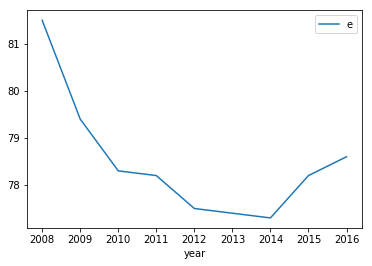

In [159]:
empl_tall.loc[empl_tall['municipality'] == 'Lejre', :].plot(x='year',y='e'); 

In [160]:
import ipywidgets as widgets

In [162]:
def plot_e(dataframe, municipality): 
    I = dataframe['municipality'] == municipality
    dataframe.loc[I,:].plot(x='year', y='e')

In [165]:
all_municipalities = empl_tall.municipality.unique()

In [167]:
widgets.interact(plot_e, 
                 dataframe = widgets.fixed(empl_tall),
                 municipality = widgets.Dropdown(description='Municipality', options=all_municipalities, value='Lejre')
                 ); 

interactive(children=(Dropdown(description='Municipality', index=32, options=('København', 'Frederiksberg', 'D…

## Income

Next, we will read in the avg. disposable income for highly educated in each municipality

In [168]:
inc = pd.read_excel('./data/INDKP107.xlsx', skiprows=2)

inc.drop([f'Unnamed: {i}' for i in range(4)], axis=1, inplace=True)
inc.rename(columns = {'Unnamed: 4':'municipality'}, inplace=True)
inc.rename(columns = {str(i): f'inc{i}' for i in range(2004,2018)}, inplace=True)

for val in ['Region','Landsdel', 'Hele landet']: 
    I = inc.municipality.str.contains(val)
    inc.drop(inc[I == False].index, inplace=True)

inc.head(5)

municipality   inc2004   inc2005   inc2006   inc2007   inc2008  \
0              Hele landet  283479.0  299959.0  313244.0  314747.0  306692.0   
1       Region Hovedstaden  291967.0  313064.0  327543.0  327163.0  317789.0   
2  Landsdel Byen København  243933.0  255880.0  267326.0  265819.0  268647.0   
3                København  233204.0  244462.0  255315.0  254533.0  259216.0   
4            Frederiksberg  276111.0  291299.0  305539.0  301547.0  296988.0   

    inc2009   inc2010   inc2011   inc2012   inc2013   inc2014   inc2015  \
0  312650.0  357568.0  364077.0  372494.0  383394.0  393843.0  402813.0   
1  318511.0  371004.0  378890.0  388151.0  398802.0  411928.0  422364.0   
2  275929.0  309857.0  317140.0  321683.0  330261.0  337636.0  348220.0   
3  266636.0  297422.0  303717.0  308601.0  316362.0  325070.0  334083.0   
4  304406.0  349249.0  356537.0  363466.0  376072.0  379308.0  397210.0   

    inc2016   inc2017  
0  392357.0  398937.0  
1  411602.0  417547.0  
2  340119.0  348574.0  
3  327179.0  333579.0  
4  389151.0  409097.0

**WARNING:** We now have missings. This will cause errors when we keep working. Here is how many missings we have for the variable `region`

In [169]:
inc.municipality.isnull().sum() # number of missings 

2

**Solution:** We just drop the missings. 

In [170]:
print(f'Size before: {inc.shape}')
inc.dropna(inplace=True)
print(f'Size after: {inc.shape}')

Size before: (117, 15)
Size after: (115, 15)


Convert wide->tall

In [171]:
inc_tall = pd.wide_to_long(df=inc, stubnames='inc', i='municipality', j='year').reset_index(drop=False)
inc_tall.head(5)

municipality  year       inc
0              Hele landet  2004  283479.0
1       Region Hovedstaden  2004  291967.0
2  Landsdel Byen København  2004  243933.0
3                København  2004  233204.0
4            Frederiksberg  2004  276111.0

## Municipal area

Finally, let's read in a dataset on municipality areas in km$^2$. 

In [174]:
area = pd.read_excel('./data/areal.xlsx', skiprows=2)
area.rename(columns = {'Unnamed: 0':'municipality','areal':'km2'}, inplace=True)
area.dropna(inplace=True)
area.head(2)

municipality      km2
0         Hele landet  42934.1
1  Region Hovedstaden   2559.4

## Writing data

As with reading in data, we have the corresponding functions 
* df.to_csv()
* df.to_excel()
* df.to_stata()
* df.to_sas()
* df.to_hdf(): Pro = low memory footprint, cons = restrictive as to which variables you can save; Python only. 
* df.to_pickle(): Pro = quick and dirty, can save all variable types. Cons = Python only; quite unsafe (a malicious hacker can store a virus in a pickle!). 

Let's save our dataset to CSV form. We will set `index=False` to avoid saving the index (which does not mean anything here but can in other contexts be an annoying thing). 

In [60]:
empl_tall.to_csv('./data/RAS200_tall.csv', index=False)

In [61]:
inc_tall.to_csv('./data/INDKP107_tall.csv', index=False)

In [62]:
area.to_csv('./data/area.csv', index=False)